In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import pandas as pd
import os
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
location = pd.read_csv('/content/drive/MyDrive/location.csv',usecols = ['station','longitude','latitude'])

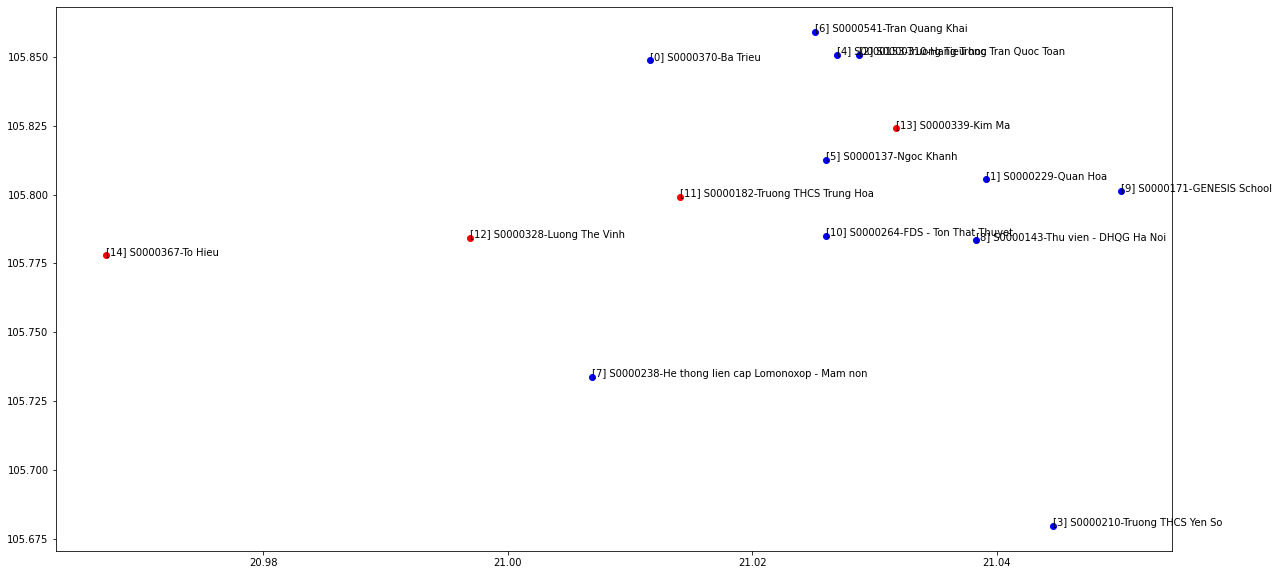

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(location['latitude'][:11],location['longitude'][:11],color = 'blue', marker='o')
plt.scatter(location['latitude'][11:],location['longitude'][11:],color = 'red', marker='o')

for i, txt in enumerate(location['station']):
    plt.annotate("[" + str(i) + "] " + txt, (location['latitude'][i], location['longitude'][i]))

**READ DATA TRAIN INPUT**

In [ ]:
df_Ngoc_Khanh = pd.read_csv('/content/drive/MyDrive/input/S0000137-Ngoc Khanh.csv',usecols = ['timestamp','PM2.5','humidity','temperature'])
df_Thu_vien_DHQG_Ha_Noi = pd.read_csv('/content/drive/MyDrive/input/S0000143-Thu vien - DHQG Ha Noi.csv',usecols = ['timestamp','PM2.5','humidity','temperature'])
df_Truong_Tieu_hoc_Tran_Quoc_Toan = pd.read_csv('/content/drive/MyDrive/input/S0000153-Truong Tieu hoc Tran Quoc Toan.csv',usecols = ['timestamp','PM2.5','humidity','temperature'])
df_GENESIS_School = pd.read_csv('/content/drive/MyDrive/input/S0000171-GENESIS School.csv',usecols = ['timestamp','PM2.5','humidity','temperature'])
df_Truong_THCS_Yen_So = pd.read_csv('/content/drive/MyDrive/input/S0000210-Truong THCS Yen So.csv',usecols = ['timestamp','PM2.5','humidity','temperature'])
df_Quan_Hoa = pd.read_csv('/content/drive/MyDrive/input/S0000229-Quan Hoa.csv',usecols = ['timestamp','PM2.5','humidity','temperature'])
df_He_thong_lien_cap_Lomonoxop_Mam_non = pd.read_csv('/content/drive/MyDrive/input/S0000238-He thong lien cap Lomonoxop - Mam non.csv',usecols = ['timestamp','PM2.5','humidity','temperature'])
df_FDS_Ton_That_Thuyet = pd.read_csv('/content/drive/MyDrive/input/S0000264-FDS - Ton That Thuyet.csv',usecols = ['timestamp','PM2.5','humidity','temperature'])
df_Hang_Trong = pd.read_csv('/content/drive/MyDrive/input/S0000310-Hang Trong.csv',usecols = ['timestamp','PM2.5','humidity','temperature'])
df_Ba_Trieu = pd.read_csv('/content/drive/MyDrive/input/S0000370-Ba Trieu.csv',usecols = ['timestamp','PM2.5','humidity','temperature'])
df_Tran_Quang_Khai = pd.read_csv('/content/drive/MyDrive/input/S0000541-Tran Quang Khai.csv',usecols = ['timestamp','PM2.5','humidity','temperature'])

**READ DATA TRAIN OUTPUT**

In [ ]:
df_Truong_THCS_Trung_Hoa = pd.read_csv('/content/drive/MyDrive/output/S0000182-Truong THCS Trung Hoa.csv',usecols = ['timestamp','PM2.5','humidity','temperature'])
df_Luong_The_Vinh = pd.read_csv('/content/drive/MyDrive/output/S0000328-Luong The Vinh.csv',usecols = ['timestamp','PM2.5','humidity','temperature'])
df_Kim_Ma = pd.read_csv('/content/drive/MyDrive/output/S0000339-Kim Ma.csv',usecols = ['timestamp','PM2.5','humidity','temperature'])
df_To_Hieu = pd.read_csv('/content/drive/MyDrive/output/S0000367-To Hieu.csv',usecols = ['timestamp','PM2.5','humidity','temperature'])

**NAME LOCATION TRAIN**

In [ ]:
data_train = [df_Ngoc_Khanh,
              df_Thu_vien_DHQG_Ha_Noi,
              df_Truong_Tieu_hoc_Tran_Quoc_Toan,
              df_GENESIS_School,
              df_Truong_THCS_Yen_So,
              df_Quan_Hoa,
              df_He_thong_lien_cap_Lomonoxop_Mam_non,
              df_FDS_Ton_That_Thuyet,
              df_Hang_Trong,
              df_Ba_Trieu,
              df_Tran_Quang_Khai,
              df_Truong_THCS_Trung_Hoa,
              df_Luong_The_Vinh,
              df_Kim_Ma,
              df_To_Hieu]
'''data_train = [df_Ngoc_Khanh,
              df_Thu_vien_DHQG_Ha_Noi,
              df_Truong_Tieu_hoc_Tran_Quoc_Toan,

              df_Quan_Hoa,

              df_FDS_Ton_That_Thuyet,
              df_Hang_Trong,


              df_Truong_THCS_Trung_Hoa,
              df_Luong_The_Vinh,
              df_Kim_Ma,
              df_To_Hieu]'''
print(len(data_train))

15


**KERAS**

In [ ]:
#import tensorflow as tf
#import numpy as np
#from tensorflow import keras
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dropout, LSTM

In [ ]:
data_train[0][0:99]

,timestamp,PM2.5,humidity,temperature
0,27/05/2020 12:00,23.66,64.09,29.96
1,27/05/2020 13:00,23.08,63.05,30.07
2,27/05/2020 14:00,25.68,67.51,29.77
3,27/05/2020 15:00,26.37,71.17,29.11
4,27/05/2020 16:00,27.57,71.60,29.08
...,...,...,...,...
94,31/05/2020 10:00,34.49,68.35,32.82
95,31/05/2020 11:00,29.68,61.98,34.33
96,31/05/2020 12:00,24.18,54.54,35.58
97,31/05/2020 13:00,19.55,49.92,36.33


**INTERPOLATE MISSING DATA**

In [ ]:
for i in range(0, len(data_train)):
  data_train[i] = data_train[i].interpolate(method = 'linear', limit_direction = 'both')
data_train[1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    9000 non-null   object 
 1   PM2.5        9000 non-null   float64
 2   humidity     9000 non-null   float64
 3   temperature  9000 non-null   float64
dtypes: float64(3), object(1)
memory usage: 281.4+ KB


In [ ]:
X_train, y_train, X_val, y_val = [], [], [], []
for i in range(0, len(data_train)-1):
  X_train.append(data_train[i].drop(['PM2.5','timestamp'], axis = 1))
  y_train.append(data_train[i]['PM2.5'])
for i in range(len(data_train)-1, len(data_train)):
  X_val.append(data_train[i].drop(['PM2.5','timestamp'], axis = 1))
  y_val.append(data_train[i]['PM2.5'])

In [ ]:
#X_train , X_val , y_train , y_val = train_test_split(X,y,test_size = 0.2)
X_train[0].shape

(9000, 2)

In [ ]:
X_val[0]

In [ ]:
#import tensorflow as tf
#import numpy as np
#from tensorflow import keras
#from keras import Sequential
#from keras.layers import Dense
#from tensorflow.keras.optimizers import Adam

In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape)
print(X_train[0].shape)

(14, 9000, 2)
(9000, 2)


In [ ]:
model= {}
for i in range(14):
  model[i] = Sequential()
  model[i].add(LSTM(64, activation='relu', input_shape=(X_train[i].shape[0], X_train[i].shape[0]), return_sequences=True))
  model[i].add(Dense(128, activation = 'relu'))
  model[i].add(Dropout(0.2))
  model[i].add(Dense(128, activation = 'relu'))
  model[i].add(Dropout(0.2))
  model[i].add(Dense(64, activation = 'relu'))
  model[i].add(Dropout(0.2))
  model[i].add(Dense(128, activation = 'relu'))
  model[i].add(Dropout(0.2))
  model[i].add(Dense(64, activation = 'relu'))
  model[i].add(Dropout(0.2))
  model[i].add(Dense(32, activation = 'relu'))
  model[i].add(Dropout(0.2))
  model[i].add(Dense(24, activation = 'linear'))
  model[i].compile(loss = 'mean_squared_error', optimizer= Adam(learning_rate = 0.005), metrics = ['mae'] )
  #model[i].fit(X_train[i], y_train[i], epochs = 5, batch_size = 8, validation_data = (X_val[0], y_val[0]))
  #model[i].fit(X_train[i], y_train[i], epochs = 5, batch_size = 8)



In [ ]:
model[0].predict([[68, 30]])

**PUBLIC TEST**

In [ ]:
predict_location = pd.read_csv('/content/drive/MyDrive/public-test/location.csv',usecols = ['station','longitude','latitude'])
num_location = len(predict_location['station'])

In [ ]:
place_test = pd.read_csv('/content/drive/MyDrive/public-test/input/1/S0000264-FDS - Ton That Thuyet.csv',usecols = ['timestamp','PM2.5','humidity','temperature'])
place_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    168 non-null    object 
 1   PM2.5        147 non-null    float64
 2   humidity     53 non-null     float64
 3   temperature  55 non-null     float64
dtypes: float64(3), object(1)
memory usage: 5.4+ KB


In [ ]:
place_test = place_test.interpolate(method ='linear', limit_direction ='both')
place_test['timestamp'] = pd.to_datetime(place_test['timestamp'])
place_test['timestamp'] = place_test.timestamp.apply(lambda x: x.hour)
place_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    168 non-null    int64  
 1   PM2.5        168 non-null    float64
 2   humidity     168 non-null    float64
 3   temperature  168 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 5.4 KB


In [ ]:
if( place_test['PM2.5'].isnull().sum(axis = 0) == place_test['humidity'].isnull().sum(axis = 0) == place_test['temperature'].isnull().sum(axis = 0) == len(place_test)):
  place_test['PM2.5'] = data_train[0]['PM2.5']
  place_test['humidity'] = data_train[0]['humidity']
  place_test['temperature'] = data_train[0]['temperature']

In [ ]:
test_result = model.predict(place_test.drop(['PM2.5','timestamp'], axis=1))[0:1]
test_result = test_result[0]
print(test_result)

[41.102173 41.09353  41.097984 41.087276 41.094795 41.085182 41.090366
 41.095215 41.09493  41.08896  41.092327 41.096664 41.093346 41.083786
 41.09668  41.092842 41.092407 41.10228  41.097435 41.082268 41.092392
 41.09906  41.10035  41.09758 ]


In [ ]:
from random import seed
from random import randint
dir = '/content/drive/MyDrive/public-test/input'

for i in range(1,101):
  path_folder_index = dir + '/' +str(i)
  print(path_folder_index)
  final_res = []

  res_folder_path = '{}'.format(i)
  if not os.path.exists(res_folder_path):
      os.mkdir(res_folder_path)

  for file in os.listdir(path_folder_index):
    if file.endswith(".csv"):
      file_path = path_folder_index + '/' + str(file)
      test_result = model.predict(place_test.drop(['PM2.5','timestamp'], axis=1))[0:1]
      test_result = test_result[0]
      final_res.append(test_result)

  for j in range(1, num_location + 1):
    df = pd.DataFrame({'PM2.5': final_res[randint(0,10)]})
    res_file_path = res_folder_path + '/res_'+str(i)+'_'+str(j)+ '.csv'
    df.to_csv(res_file_path,index=False)

/content/drive/MyDrive/public-test/input/1
/content/drive/MyDrive/public-test/input/2
/content/drive/MyDrive/public-test/input/3
/content/drive/MyDrive/public-test/input/4
/content/drive/MyDrive/public-test/input/5
/content/drive/MyDrive/public-test/input/6
/content/drive/MyDrive/public-test/input/7
/content/drive/MyDrive/public-test/input/8
/content/drive/MyDrive/public-test/input/9
/content/drive/MyDrive/public-test/input/10
/content/drive/MyDrive/public-test/input/11
/content/drive/MyDrive/public-test/input/12
/content/drive/MyDrive/public-test/input/13
/content/drive/MyDrive/public-test/input/14
/content/drive/MyDrive/public-test/input/15
/content/drive/MyDrive/public-test/input/16
/content/drive/MyDrive/public-test/input/17
/content/drive/MyDrive/public-test/input/18
/content/drive/MyDrive/public-test/input/19
/content/drive/MyDrive/public-test/input/20
/content/drive/MyDrive/public-test/input/21
/content/drive/MyDrive/public-test/input/22
/content/drive/MyDrive/public-test/input/

In [ ]:
output_filename = 'prediction.zip'
for i in range(1,101):
  folder_path = '{}'.format(i)
  for j in range(1, num_location + 1):
    file_path = folder_path + '/res_' + str(i) + '_' + str(j) + '.csv'
    os.system( "zip {} {}".format( output_filename , file_path ))

In [ ]:
for i in range(1,101):
  folder_path = '{}'.format(i)
  for j in range(1,5):
    file_path = folder_path + '/res_'+str(i)+'_'+str(j)+ '.csv'
    os.system("rm {}".format(file_path ))
  os.system("rm -rf {}".format(folder_path ))